In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

import sys
sys.path.append('./..')

from refuelplot import *
setup()
sns.set_style("darkgrid")

In [2]:
tx_path = '/data/projects/texas-power-outages/data/interim/'
temp_path = tx_path + 'temperatures/temppop/'
load_path = tx_path + 'load/'
fig_path = '/data/projects/texas-power-outages/data/figures/'

In [3]:
# load temperature population indicator
tpxr = xr.open_mfdataset(temp_path + 'temppop_????C.nc').__xarray_dataarray_variable__
tpxr.name= 'tp'
tp = tpxr.to_dataframe().tz_localize('UTC').tz_convert('Etc/GMT+6')
tpd = tp.resample('D').mean()

<AxesSubplot:xlabel='time'>

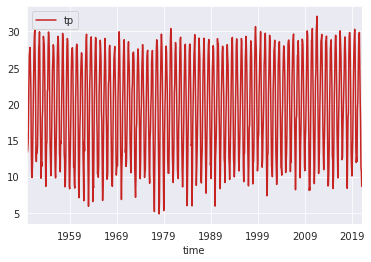

In [4]:
tp.resample('M').mean().plot()

<AxesSubplot:xlabel='time'>

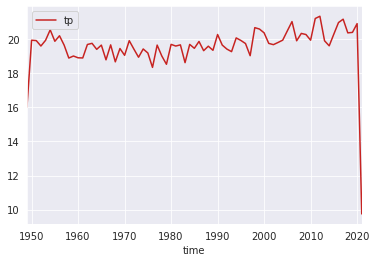

In [5]:
tp.resample('Y').mean().plot()

In [6]:
tpm = tp.resample('M').mean()
tpm['year'] = tpm.index.year
tpm['month'] = tpm.index.month

<AxesSubplot:xlabel='year', ylabel='tp'>

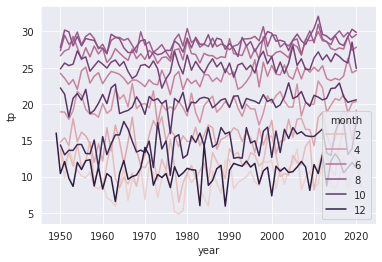

In [7]:
sns.lineplot(data=tpm,x='year',y='tp',hue='month')

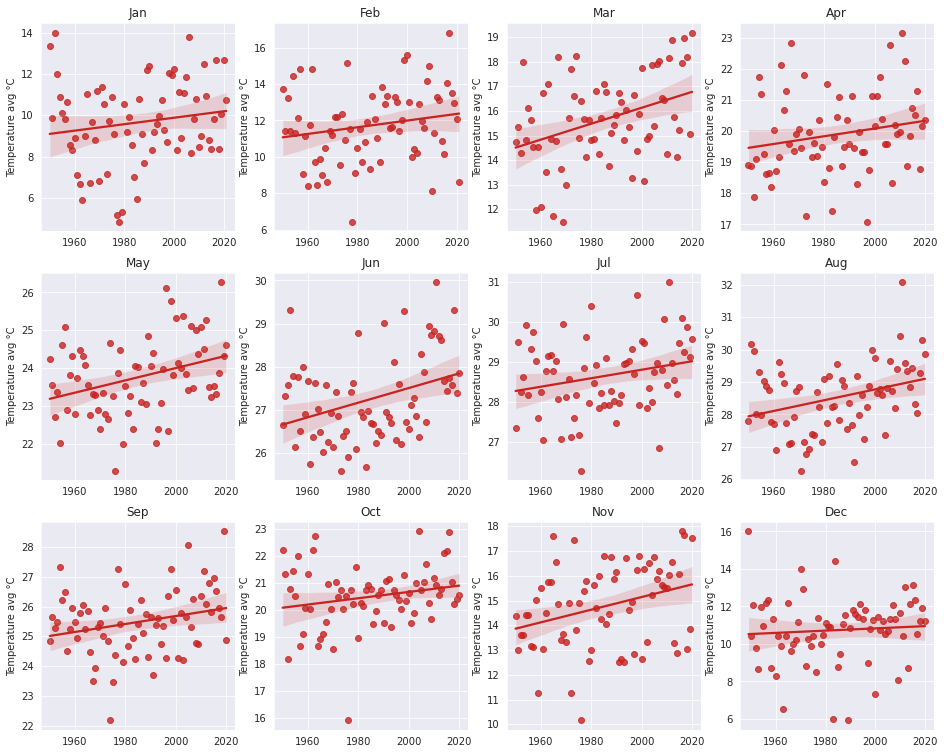

In [8]:
(fig,axes) = plt.subplots(3,4,figsize=(16,13))

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i, ax in enumerate(axes.flat):
    sns.regplot(x="year", y="tp", data=tpm[tpm.month==(i+1)],ax=ax)
    ax.set_title(months[i])
    ax.set_ylabel('Temperature avg °C')
    ax.set_xlabel('')

In [9]:
tpy = tp.resample('Y').mean()['1950':'2020']
tpy['year'] = tpy.index.year

In [20]:
sns.set_style(style='white')

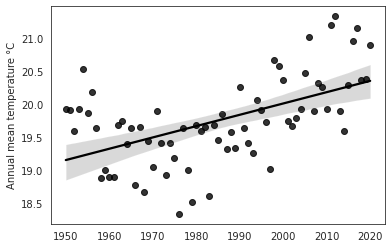

In [21]:
sns.regplot(x="year", y="tp", data=tpy,color='black')
plt.ylabel('Annual mean temperature °C')
plt.xlabel('')
plt.savefig(fig_path + 'temp_trend.pdf',dpi=300)

In [14]:
print('temperature increase:')
print(round(np.polyfit(tpy.year, tpy.tp, 1)[0],3),'°C/year')

temperature increase:
0.017 °C/year
